<a href="https://colab.research.google.com/github/Vishu-Gupta/MLProjects/blob/main/03%20Deep%20Learning/01%20Melanoma_Detection/01%20CNN_Based_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

#### **Task 1: Reading the data**

Importing all the important libraries

In [1]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [2]:
## If you are using the data by mounting the google drive, use the following:
## from google.colab import drive
## drive.mount('/content/gdrive')

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
# Provide authentication for drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [4]:
# Your GDrive Directory
#!ls /content/gdrive/MyDrive

In [5]:
# Unzipping the files
# To do: Update the folder name and file name
!unzip /content/CNN_assignment.zip

Archive:  /content/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer I

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [6]:
# Defining the path for train and test images
## To do: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Check whether the data has been extracted successfully.

In [7]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [9]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [12]:
len(train_ds)

56

In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [14]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

In [15]:
for images,labels in train_ds.take(1):
    print(type(labels))

<class 'tensorflow.python.framework.ops.EagerTensor'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


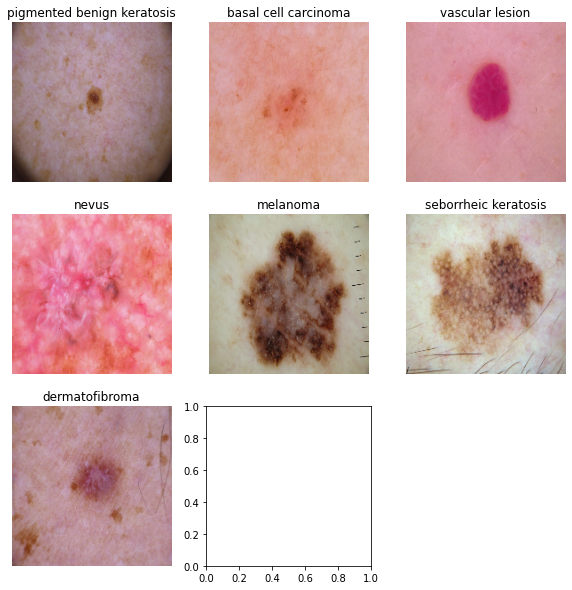

In [16]:
import matplotlib.pyplot as plt

covered_classes = []
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(3, 3, len(covered_classes) + 1)
    if (class_names[labels[i]] in covered_classes):
      continue
    else:
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      covered_classes.append(class_names[labels[i]])
      plt.axis("off")
    if len(covered_classes)==9:
      break

In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [19]:
### Your code goes here
model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

`< Double click on the cell to write your answer here.>`

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [20]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        36928     
                                                        

#### Train the model

In [22]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 27s 232ms/step - loss: 2.1477 - accuracy: 0.2015 - val_loss: 1.9718 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 9s 166ms/step - loss: 1.7609 - accuracy: 0.3767 - val_loss: 1.5881 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 9s 167ms/step - loss: 1.4580 - accuracy: 0.4989 - val_loss: 1.3988 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 9s 169ms/step - loss: 1.3872 - accuracy: 0.5212 - val_loss: 1.4110 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 9s 167ms/step - loss: 1.2408 - accuracy: 0.5564 - val_loss: 1.4741 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 9s 167ms/step - loss: 1.2616 - accuracy: 0.5564 - val_loss: 1.5849 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 9s 167ms/step - loss: 1.0835 - accuracy: 0.6211 - val_loss: 1.5397 - val_accuracy: 0.5145
Epoch 8/20
56/56

#### Visualizing training results

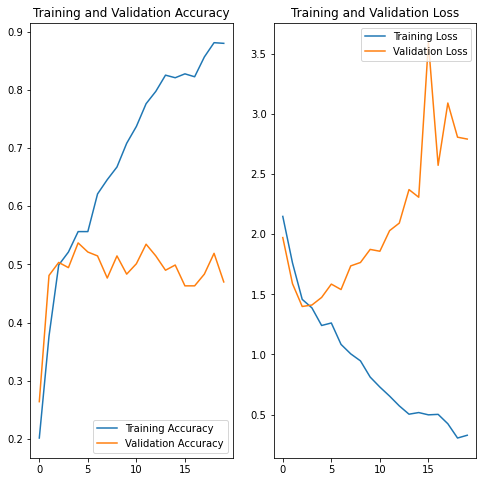

In [23]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## Ans:
Training accuracy is touching 0.9 , whereas validation accuracy is at 0.5 only, which indicates model is highly overfitting

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [24]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

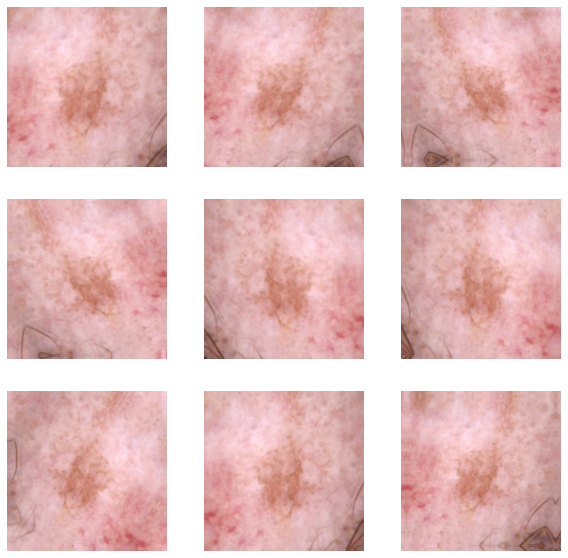

In [25]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [26]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)
model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                      

Compiling the model

In [27]:
## Your code goes here
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [28]:
# Note: Train your model for 20 epochs
## Your code goes here
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 13s 207ms/step - loss: 2.1356 - accuracy: 0.1953 - val_loss: 1.9982 - val_accuracy: 0.2327
Epoch 2/20
56/56 [==============================] - 11s 202ms/step - loss: 1.9210 - accuracy: 0.2985 - val_loss: 1.8347 - val_accuracy: 0.3624
Epoch 3/20
56/56 [==============================] - 11s 203ms/step - loss: 1.7627 - accuracy: 0.3588 - val_loss: 1.7168 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 11s 202ms/step - loss: 1.6397 - accuracy: 0.4068 - val_loss: 1.5417 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 11s 203ms/step - loss: 1.6290 - accuracy: 0.4196 - val_loss: 1.5561 - val_accuracy: 0.4519
Epoch 6/20
56/56 [==============================] - 11s 203ms/step - loss: 1.5450 - accuracy: 0.4548 - val_loss: 1.5069 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 11s 202ms/step - loss: 1.4839 - accuracy: 0.4754 - val_loss: 1.6161 - val_accuracy: 0.4631
Epoch 8/20

#### Visualizing the results

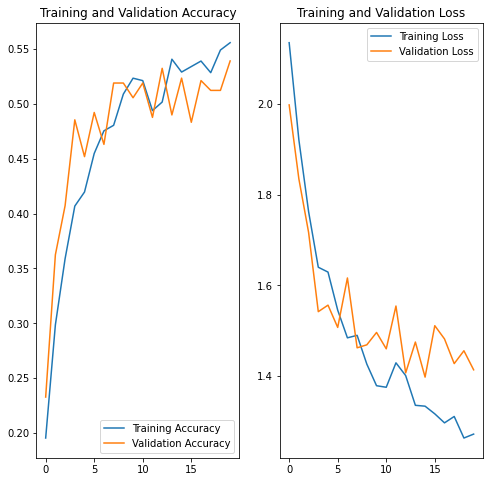

In [29]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Ans:
Overfit has been resolved by adding dropout layers as well as some augmented images.

Model is generalising more, but accuracy is very less

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [30]:
## Your code goes here.
from glob import glob
label_paths = glob('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/')
class_distri={}
for path in label_paths:
  images = glob(f'{path}/*.jpg')
  label_class = path.split('/')[4] 
  #print(len(images))
  class_distri[label_class] = len(images)

label_df = pd.DataFrame.from_dict(class_distri,orient='index',columns=['Count']).reset_index()
label_df = label_df.rename(columns={'index':'Skin Cancer type'})
label_df.sort_values('Count',ascending=True)

,Skin Cancer type,Count
7,seborrheic keratosis,77
1,dermatofibroma,95
8,actinic keratosis,114
2,vascular lesion,139
4,squamous cell carcinoma,181
3,nevus,357
5,basal cell carcinoma,376
6,melanoma,438
0,pigmented benign keratosis,462


In [31]:
label_df['Proportion'] = label_df['Count']/label_df['Count'].sum()
label_df.sort_values('Proportion',ascending=False)

,Skin Cancer type,Count,Proportion
0,pigmented benign keratosis,462,0.206342
6,melanoma,438,0.195623
5,basal cell carcinoma,376,0.167932
3,nevus,357,0.159446
4,squamous cell carcinoma,181,0.080840
2,vascular lesion,139,0.062081
8,actinic keratosis,114,0.050916
1,dermatofibroma,95,0.042430
7,seborrheic keratosis,77,0.034390


#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


## Ans:
1. seborrheic keratosis - has the least no of samples (only 77)
2. Data is dominated by the following 4 classes-

  a)pigmented benign keratosis 

  b)melanoma

  c)basal cell carcinoma

  d)nevus

#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
# Provide the path for the training dataset
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF40729A210>: 100%|██████████| 500/500 [00:22<00:00, 22.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF407262CD0>: 100%|██████████| 500/500 [00:23<00:00, 20.91 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF4072AE190>: 100%|██████████| 500/500 [00:23<00:00, 21.15 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FF407369890>: 100%|██████████| 500/500 [01:48<00:00,  4.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF407370790>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF407DCDB50>: 100%|██████████| 500/500 [00:19<00:00, 25.30 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FF407752ED0>: 100%|██████████| 500/500 [00:46<00:00, 10.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF40779ECD0>: 100%|██████████| 500/500 [00:19<00:00, 25.50 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF4072BBD90>: 100%|██████████| 500/500 [00:20<00:00, 24.89 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [34]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028180.jpg_18d802cd-b509-4a17-aca3-9cb29cf50d07.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026553.jpg_88e47307-f17d-4710-9010-df7400410175.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025777.jpg_33aad18d-0b64-4b26-8349-097bed74efae.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026273.jpg_7cee13cb-8f14-44be-b1ef-b8628ee746d4.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027192.jp

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()
added_images = df2.groupby('Label').count()
added_images = added_images.reset_index()
added_images = added_images.rename(columns={'Path':'Count','Label':'Skin Cancer type'})
added_images

,Skin Cancer type,Count
0,actinic keratosis,500
1,basal cell carcinoma,500
2,dermatofibroma,500
3,melanoma,500
4,nevus,500
5,pigmented benign keratosis,500
6,seborrheic keratosis,500
7,squamous cell carcinoma,500
8,vascular lesion,500


In [39]:
new_df = label_df.set_index('Skin Cancer type')['Count'] + added_images.set_index('Skin Cancer type')['Count']

In [40]:
new_df

Skin Cancer type
actinic keratosis             614
basal cell carcinoma          876
dermatofibroma                595
melanoma                      938
nevus                         857
pigmented benign keratosis    962
seborrheic keratosis          577
squamous cell carcinoma       681
vascular lesion               639
Name: Count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [41]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [42]:
# Provide the path here
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [43]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create your model (make sure to include normalization)**

In [44]:
## Your code goes here
model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                        

**Compile your model (Choose optimizer and loss function appropriately)**

In [45]:
## Your code goes here
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train your model**

In [46]:
# Note: Train your model for 30 epochs
## Your code goes here

epochs = 30

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 55s 310ms/step - loss: 3.8305 - accuracy: 0.2736 - val_loss: 6.1894 - val_accuracy: 0.0831
Epoch 2/30
169/169 [==============================] - 41s 237ms/step - loss: 1.8815 - accuracy: 0.2980 - val_loss: 5.0874 - val_accuracy: 0.0973
Epoch 3/30
169/169 [==============================] - 41s 237ms/step - loss: 1.8020 - accuracy: 0.3201 - val_loss: 2.1955 - val_accuracy: 0.1841
Epoch 4/30
169/169 [==============================] - 41s 237ms/step - loss: 1.7371 - accuracy: 0.3435 - val_loss: 2.1435 - val_accuracy: 0.2004
Epoch 5/30
169/169 [==============================] - 41s 236ms/step - loss: 1.6181 - accuracy: 0.3793 - val_loss: 1.6853 - val_accuracy: 0.3534
Epoch 6/30
169/169 [==============================] - 41s 238ms/step - loss: 1.6073 - accuracy: 0.3715 - val_loss: 1.8726 - val_accuracy: 0.2762
Epoch 7/30
169/169 [==============================] - 41s 238ms/step - loss: 1.5528 - accuracy: 0.3945 - val_loss: 1.6772 - val_accuracy: 0.3

**Visualize the model results**

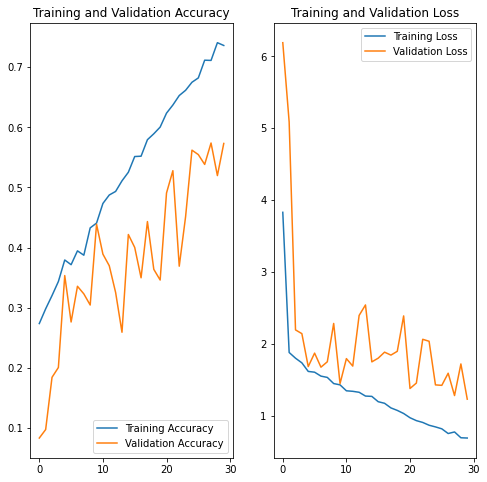

In [47]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


## Ans:
1. Underfitting has been reduced
2. Class rebalance has helped